<a href="https://colab.research.google.com/github/daystalker/VIP_AINEAI_Projects/blob/main/VIP_Project8_SaibharadwajCheekoti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8: Machine Learning for Predictive Analytics

# Churn prediction 
is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel a subscription to a service.

Although originally a telcom giant thing, this concerns businesses of all sizes, including startups. Now, thanks to prediction services and APIs, predictive analytics are no longer exclusive to big players that can afford to hire teams of data scientists.

As an example of how to use churn prediction to improve your business, let’s consider businesses that sell subscriptions. This can be telecom companies, SaaS companies, and any other company that sells a service for a monthly fee.

There are three possible strategies those businesses can use to generate more revenue: acquire more customers, upsell existing customers, or increase customer retention. All the efforts made as part of one of the strategies have a cost, and what we’re ultimately interested in is the return on investment: the ratio between the extra revenue that results from these efforts and their cost

In this study, we tried to predict Customer Churn using logistic regression, Random Forest and Naive Bayesian classifier.

Variable Prediction:
1.    CustomerID                   
1.   MonthlyRevenue             
1.     MonthlyMinutes            
1.     TotalRecurringCharge      
1.     DirectorAssistedCalls      
1.     OverageMinutes             
1.    RoamingCalls              
1.    PercChangeMinutes         
1.     PercChangeRevenues        
1.    DroppedCalls               
1.    BlockedCalls               
1.    UnansweredCalls           
1.    CustomerCareCalls         
1.    ThreewayCalls             
1.    ReceivedCalls              
1.    OutboundCalls              
1.    InboundCalls              
1.    PeakCallsInOut            
1.   OffPeakCallsInOut          
1.   DroppedBlockedCalls        
1.    CallForwardingCalls        
1.    CallWaitingCalls           
1.    MonthsInService           
1.   UniqueSubs               
1.    ActiveSubs                
1.   ServiceArea                
1.   Handsets                  
1.   HandsetModels              
1.    CurrentEquipmentDays      
1.   AgeHH1                     
1.    AgeHH2                    
1.    ChildrenInHH              
1.    HandsetRefurbished         
1.   HandsetWebCapable          
1.    TruckOwner                 
1.   RVOwner                   
1.    Homeownership            
1.    BuysViaMailOrder           
1.    RespondsToMailOffers       
1.    OptOutMailings            
1.   NonUSTravel               
1.    OwnsComputer              
1.    HasCreditCard             
1.   RetentionCalls            
1.    RetentionOffersAccepted    
1.   NewCellphoneUser         
1.    NotNewCellphoneUser       
1.    ReferralsMadeBySubscriber  
1.    IncomeGroup                
1.   OwnsMotorcycle           
1.   AdjustmentsToCreditRating  
1.    HandsetPrice               
1.    MadeCallToRetentionTeam    
1.   CreditRating               
1.    PrizmCode                 
1.    Occupation                
1.   MaritalStatus              

## # <img align="left" width="80" height="80" src="https://raw.githubusercontent.com/akarsh/akarsh-seggemu-resume/master/akarsh%20seggemu%20resume/Assets/Assets.xcassets/AppIcon.appiconset/Icon-App-60x60%403x.png" alt="Resume application project app icon"> **Packages and setup**

In [48]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


## # # <img align="left" width="80" height="80" src="https://raw.githubusercontent.com/akarsh/akarsh-seggemu-resume/master/akarsh%20seggemu%20resume/Assets/Assets.xcassets/AppIcon.appiconset/Icon-App-60x60%403x.png" alt="Resume application project app icon"> **Reading data and initial processing**

In [49]:
cust_df_train = pd.read_csv("/content/TelecomData.csv")
cust_df_test = pd.read_csv("/content/Telecom-PredictionData.csv")

### **Placeholder for your analysis**

In [50]:
cust_df_train.shape

(51047, 58)

58 Columns and 51K rows approximately

In [51]:
cust_df_test.shape

(20000, 58)

In [52]:
cust_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [53]:
cust_df_train.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


First we will focus on target Feature and convert the same into the numerical column where Yes -> 1 and No -> 0

Total Churned customer 14711 
------------------XX--------------XX----------------


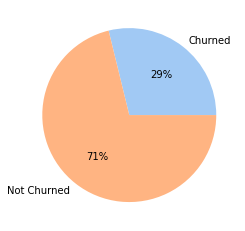

In [54]:
churn_df=cust_df_train[cust_df_train['Churn']=='Yes']
non_churn_df= cust_df_train[cust_df_train['Churn']=='No']

churned= cust_df_train[cust_df_train['Churn']=='Yes'].shape[0]
notchurned= cust_df_train[cust_df_train['Churn']=='No'].shape[0]

print("Total Churned customer {} ".format(churned))

print('------------------XX--------------XX----------------')

slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]

colors = sns.color_palette('pastel')[0:5]
plt.pie(slices, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


Data is balanced , hence we no need to go with imblanced methods

In [55]:
#Churn : Yes:1 , No:0
Churn = {'Yes': 1,'No': 0} 
  
# traversing through dataframe 
# values where key matches 
cust_df_train.Churn = [Churn[item] for item in cust_df_train.Churn] 


Pretty Good !! We have changed Churn categorical value to numerical column or binary values

In [56]:
cust_df_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# **Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)**

### **Handling missing data**

Some might quibble over our usage of missing. By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed.



In [57]:
print("Any missing sample in training set:",cust_df_train.isnull().values.any())
print("Any missing sample in test set:",cust_df_test.isnull().values.any(), "\n")

Any missing sample in training set: True
Any missing sample in test set: True 



Here we handling missing value filled by zero rather than dropping NA values. Another technique of handling missing value in addition to filled by a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

#### Q1.1 How many customers had zero monthly revenue?

In [58]:
len(cust_df_train[cust_df_train['MonthlyRevenue']==0].index)

6

#### **Q1.2 How many columns has missing values percentage > 5%**
#### *Handling Missing Values**

In [59]:
cust_df_train.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [60]:
total = cust_df_train.isnull().sum().sort_values(ascending=False)
percent = (cust_df_train.isnull().sum()/cust_df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
AgeHH1,909,0.017807
AgeHH2,909,0.017807
PercChangeMinutes,367,0.007189
PercChangeRevenues,367,0.007189
MonthlyRevenue,156,0.003056
MonthlyMinutes,156,0.003056
TotalRecurringCharge,156,0.003056
DirectorAssistedCalls,156,0.003056
OverageMinutes,156,0.003056
RoamingCalls,156,0.003056


Below Features have less than 5% missing values
- AgeHH1
- AgeHH2
- PercChangeMinutes
- PercChangeRevenues
- MonthlyRevenue
- MonthlyMinutes
- TotalRecurringCharge
- DirectorAssistedCalls
- OverageMinutes
- RoamingCalls
- ServiceArea	
- HandsetModels	
- CurrentEquipmentDays
- Handsets

<mark>__Result:__
156 customer has "NA" monthly revenue hence we need to take of these null value by replacing the same with "0".

In [61]:
# In case of imputation replaced all values with zero, There is no point to apply Median or mean for the below features because of distribution for all of them is far away from the normal disptribution

cust_df_train['MonthlyRevenue'] = cust_df_train['MonthlyRevenue'].replace(np.nan, 0)
cust_df_train['MonthlyMinutes'] = cust_df_train['MonthlyMinutes'].replace(np.nan, 0)
cust_df_train['TotalRecurringCharge'] = cust_df_train['TotalRecurringCharge'].replace(np.nan, 0)
cust_df_train['DirectorAssistedCalls'] = cust_df_train['DirectorAssistedCalls'].replace(np.nan, 0)

In [62]:
cust_df_train = cust_df_train.replace(np.nan, 0)

cust_df_train.replace(np.nan, 0, inplace=True)

In [63]:
print(cust_df_train.isna().sum())

print('---------As we can see , All missing values is being handled-------')

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

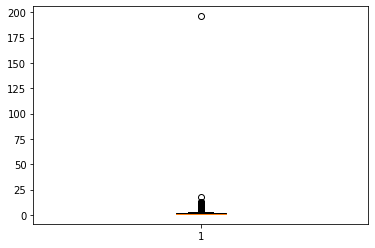

In [64]:
plt.boxplot(cust_df_train["UniqueSubs"])
plt.show()

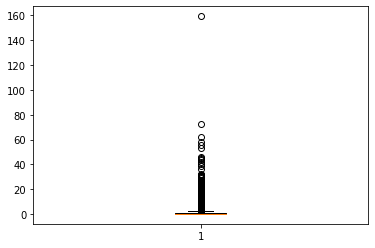

In [65]:
plt.boxplot(cust_df_train["DirectorAssistedCalls"])
plt.show()

In [66]:
def remove_outliers(df, q=0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask

In [67]:
cust_df_train["UniqueSubs"] = remove_outliers(cust_df_train['UniqueSubs'])
cust_df_train["DirectorAssistedCalls"] = remove_outliers(cust_df_train['DirectorAssistedCalls'])

# Q2. Perform exploratory analysis to analyze customer churn

Let's convert categorical columns to numerical columns before further analysis

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [69]:
# for train dataset
cust_df_train = FunLabelEncoder(cust_df_train)
cust_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  bool   
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [70]:
cust_df_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,True,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,True,1,659,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.99,10.0,17.0,False,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,False,1,611,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.00,8.0,38.0,False,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,False,1,353,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.28,1312.0,75.0,True,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,True,2,611,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.14,0.0,17.0,False,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,True,2,564,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,0,0,4,2


In [71]:
# for test Dataset
cust_df_test = FunLabelEncoder(cust_df_test)
cust_df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [72]:
cust_df_test = cust_df_test.drop(columns=['Churn'], axis=1)
cust_df_test = cust_df_test.dropna(how='any')
print(cust_df_test.shape)

(19533, 57)


In [73]:
#Frequency distribution of classes"
cust_df_train_outcome = pd.crosstab(index=cust_df_train["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column

cust_df_train_outcome

col_0,count
Churn,
0,36336
1,14711


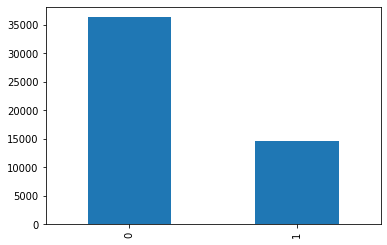

In [74]:
# Distribution of Churn
cust_df_train.Churn.value_counts()[0:30].plot(kind='bar')
plt.show()

#### Q2.1 Does customers with high overage minutes also have high revenue?

In [75]:
cust_df_train['MonthsInService'].describe()

count    51047.000000
mean        18.756264
std          9.800138
min          6.000000
25%         11.000000
50%         16.000000
75%         24.000000
max         61.000000
Name: MonthsInService, dtype: float64

highly skewed. , Mean is 18.7 ... 1st , 2nd quartile is nearly identical however 3rd quartile look like a skewed.

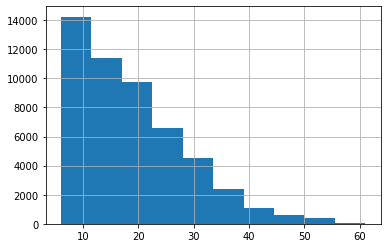

In [76]:
cust_df_train['MonthsInService'].hist()

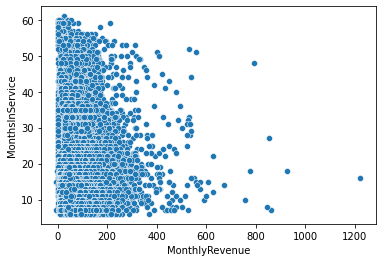

In [77]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'MonthsInService', data = cust_df_train )

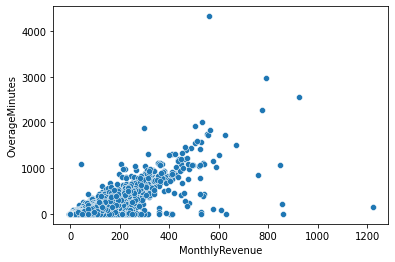

In [78]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df_train )

<mark>__Result:__

It is clear that, most of the customers with high overage minutes tend to have high Monthly Revenue.

#### Q2.2 Does high number of active subscribers lead to low monthly revenue?

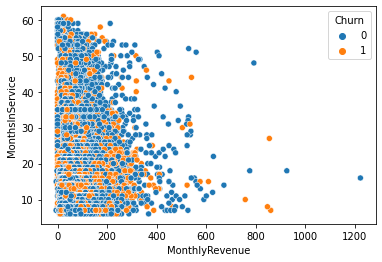

In [80]:
sns.scatterplot(x = 'MonthlyRevenue' , y = 'MonthsInService' , hue="Churn" , data = cust_df_train )

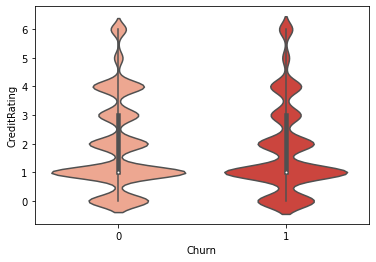

In [81]:
sns.violinplot(x=cust_df_train["Churn"],y=cust_df_train["CreditRating"],palette = "Reds")

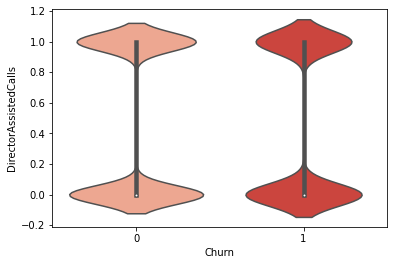

In [82]:
sns.violinplot(x=cust_df_train["Churn"],y=cust_df_train["DirectorAssistedCalls"],palette = "Reds")

Assuming that High numbers of active subscriber are based on "occupation" however by looking into the catplot , We can say that professional folks are into highly churn mode whose monthly revenue is less than 400.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


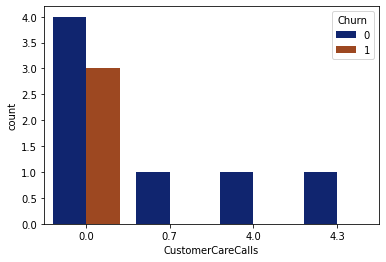

In [83]:
sns.countplot(cust_df_train["CustomerCareCalls"][:10],hue = cust_df_train["Churn"],palette = "dark")

## Q2.3 Does credit rating have an impact in churn rate?

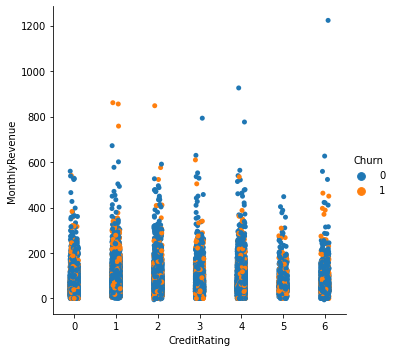

In [84]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'CreditRating' , y = 'MonthlyRevenue' , hue="Churn" , data = cust_df_train )

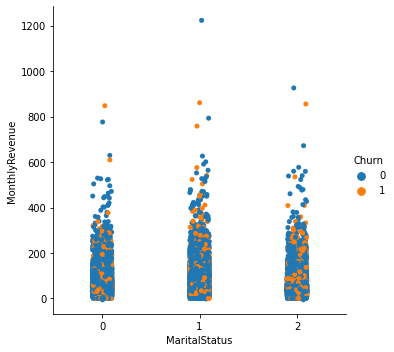

In [85]:
sns.catplot(x = 'MaritalStatus' , y = 'MonthlyRevenue' , hue="Churn" , data = cust_df_train )

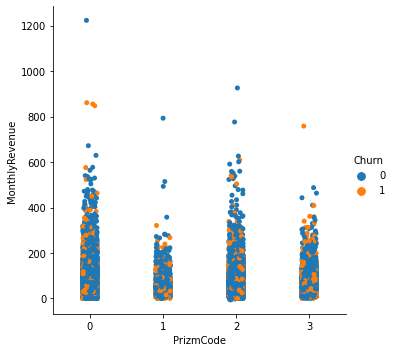

In [86]:
sns.catplot(y = 'MonthlyRevenue' , x = 'PrizmCode' , hue="Churn" , data = cust_df_train )

###### Plotting Heatmap


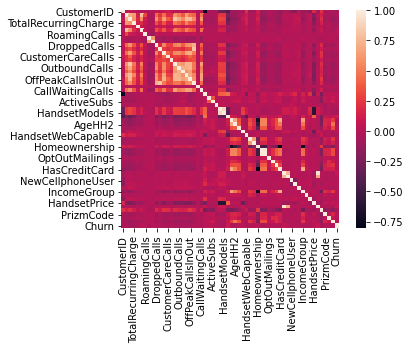

In [87]:
cust_df_train = cust_df_train[['CustomerID','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes',
         'RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
         'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls'
         ,'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels',              
'CurrentEquipmentDays','AgeHH1','AgeHH2','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',          
'NonUSTravel','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus','Churn']] 
cor = cust_df_train.corr()
sns.heatmap(cor, square = True)

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation. Here appear important variables (customer churn behavior):
1. TotalRecurringCharge
1. RoamingCalls
1. DroppedCalls
1. CustomerCareCalls
1. OutboundCalls
1. OffPeakCallsInOut
1. CallWaitingCalls
1. ActiveSubs
1. HandsetModels
1. AgeHH2
1. HandsetWebCapable
1. Homeownership
1. OptOutMailings
1. HasCreditCard
1. NewCellphoneUser
1. IncomeGroup
1. HandsetPrice
1. PrizmCode

## Q3. Create additional features to help predict churn

In [103]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df

    cust_df['perc_AverageMinutes']=cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [106]:
cust_df_train=create_features(cust_df_train)
cust_df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn,perc_active_subs,perc_recurrent_charge,perc_AverageMinutes
0,3000002,24.00,219.0,22.0,True,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,True,1,659,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,8,1,0,2,4,0,1,1.0,0.916667,0.000000
1,3000010,16.99,10.0,17.0,False,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,False,1,611,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,8,0,3,2,4,2,1,inf,1.000589,0.000000
2,3000014,38.00,8.0,38.0,False,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,False,1,353,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,15,0,2,3,1,2,0,inf,1.000000,0.000000
3,3000022,82.28,1312.0,75.0,True,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,True,2,611,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,0,0,3,0,3,0,0,2.0,0.911522,0.000000
4,3000026,17.14,0.0,17.0,False,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,True,2,564,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,0,0,4,2,1,2.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,0.00,0.0,0.0,False,0.0,0.0,0.0,0.0,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,False,1,311,2.0,2.0,526.0,68.0,64.0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,13,0,0,2,3,2,1,inf,NaN,NaN
51043,3399974,95.17,1745.0,85.0,True,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,False,1,289,2.0,2.0,464.0,48.0,48.0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,9,0,1,13,0,2,0,3,0,0,inf,0.893139,0.025788
51044,3399978,0.00,0.0,0.0,False,0.0,0.0,0.0,0.0,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,False,1,289,3.0,2.0,378.0,36.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0,1,14,0,4,0,0,0,1,inf,NaN,NaN
51045,3399990,0.00,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,False,1,412,2.0,2.0,433.0,32.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,0,0,8,0,4,0,3,0,0,inf,NaN,NaN


## Q4. Build classification model to predict customer churn month in advance

#### Initial data processing for model building exercise

In [88]:
from sklearn.model_selection import train_test_split
Y = cust_df_train['Churn']
X = cust_df_train.drop(columns=['Churn'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [89]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35732, 57)
Y train shape:  (35732,)
X test shape:  (15315, 57)
Y test shape:  (15315,)


## Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, Y_train)

# We predict target values
Y_lr_predict = lr.predict(X_test)

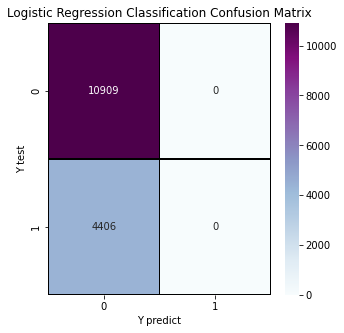

In [91]:
lr_cm = confusion_matrix(Y_test, Y_lr_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [92]:
# This gives us the Accuracy score
score_lr = lr.score(X_test, Y_test)
print(score_lr)

0.7123081945804767


In [120]:
TruePositive=lr_cm[0][0]
FalsePositive=lr_cm[0][1]
FalseNegative=lr_cm[1][0]
TrueNegative=lr_cm[1][1]



In [114]:
Accuracy=((TruePositive+TrueNegative) / (TruePositive + TrueNegative + FalseNegative + FalsePositive))
Accuracy

0.7123081945804767

In [121]:
Precision=TruePositive / ( TruePositive + FalsePositive)
Precision

1.0

In [116]:
Recall=TruePositive/(TruePositive+FalseNegative)
Recall

0.7123081945804767

In [117]:
F1=2*((Precision * Recall))/(Precision+Recall)
F1

0.8319859670530811

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [93]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

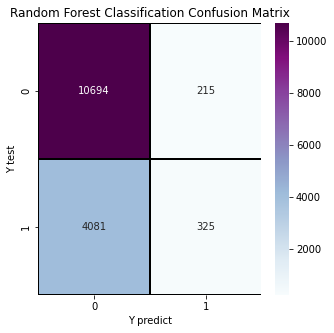

In [94]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [95]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.7194906953966699


In [124]:
TruePositive=rfcla_cm[0][0]
FalsePositive=rfcla_cm[0][1]
FalseNegative=rfcla_cm[1][0]
TrueNegative=rfcla_cm[1][1]

In [125]:
Accuracy=((TruePositive+TrueNegative) / (TruePositive + TrueNegative + FalseNegative + FalsePositive))
Accuracy

0.7194906953966699

In [126]:
Precision=TruePositive / ( TruePositive + FalsePositive)
Precision

0.980291502429187

In [127]:
Recall=TruePositive/(TruePositive+FalseNegative)
Recall

0.7237901861252115

In [128]:
F1=2*((Precision * Recall))/(Precision+Recall)
F1

0.8327363339043764

## Naive bayes classification


In [96]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

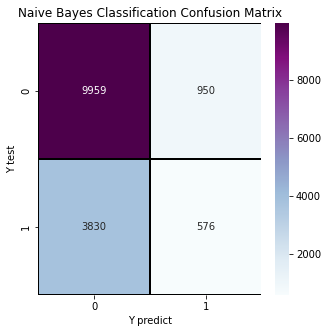

In [97]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [98]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.6878876918054195


In [129]:
TruePositive=nbcla_cm[0][0]
FalsePositive=nbcla_cm[0][1]
FalseNegative=nbcla_cm[1][0]
TrueNegative=nbcla_cm[1][1]

In [130]:
Accuracy=((TruePositive+TrueNegative) / (TruePositive + TrueNegative + FalseNegative + FalsePositive))
Accuracy

0.6878876918054195

In [131]:
Precision=TruePositive / ( TruePositive + FalsePositive)
Precision

0.9129159409661747

In [132]:
Recall=TruePositive/(TruePositive+FalseNegative)
Recall

0.7222423671042135

In [133]:
F1=2*((Precision * Recall))/(Precision+Recall)
F1

0.8064620617054011

# Comparison of classification techniques

# Test score


In [99]:
Testscores = pd.Series([score_rfcla,score_nbcla,score_lr ], 
                        index=['Random Forest Score','Naive Bayes Score','Logistic Regression' ]) 
print(Testscores)

Random Forest Score    0.719491
Naive Bayes Score      0.687888
Logistic Regression    0.712308
dtype: float64


# ROC Curve
is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

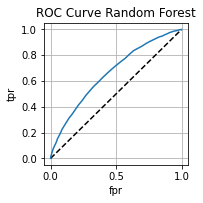

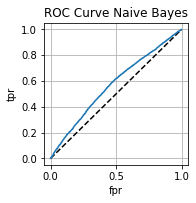

In [100]:
from sklearn.metrics import roc_curve
# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()


Random Forest perform better than Naive Bayes. Random Forest can handle categorical features very well and it can handle high dimensional spaces as well as a large number of training examples. I guess Naive Bayes is not good enough to represent complex behavior.

## Q4.3 Identify most important features impacting churn

In [135]:
print(pd.Series(rfcla.feature_importances_, index=X_train.columns))

CustomerID                   0.046291
MonthlyRevenue               0.043021
MonthlyMinutes               0.046770
TotalRecurringCharge         0.029975
DirectorAssistedCalls        0.006223
OverageMinutes               0.026255
RoamingCalls                 0.018326
PercChangeMinutes            0.047390
PercChangeRevenues           0.041329
DroppedCalls                 0.028852
BlockedCalls                 0.024535
UnansweredCalls              0.035094
CustomerCareCalls            0.018194
ThreewayCalls                0.010115
ReceivedCalls                0.034685
OutboundCalls                0.033477
InboundCalls                 0.025912
PeakCallsInOut               0.036611
OffPeakCallsInOut            0.036081
DroppedBlockedCalls          0.030357
CallForwardingCalls          0.000602
CallWaitingCalls             0.016587
MonthsInService              0.038298
UniqueSubs                   0.006383
ActiveSubs                   0.008519
ServiceArea                  0.041073
Handsets    

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

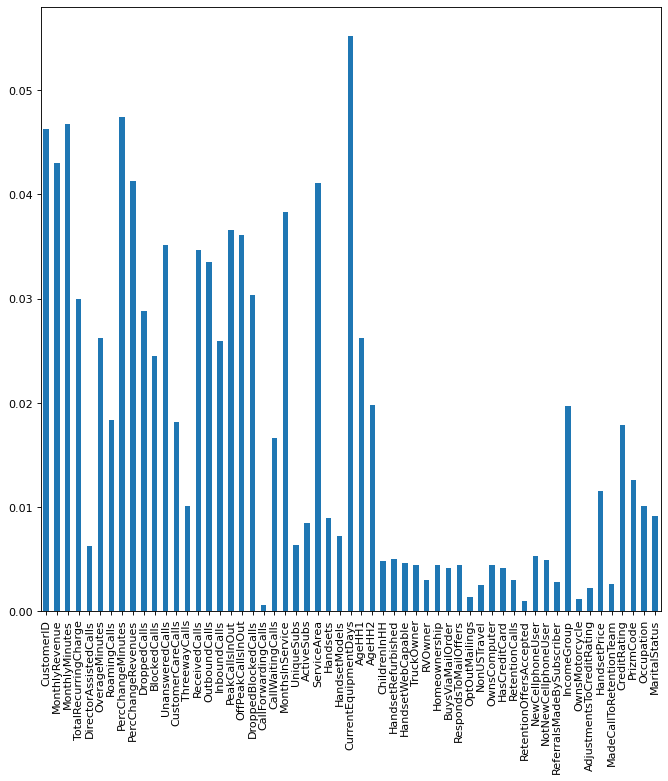

In [141]:
plt.figure(figsize=(10, 10), dpi=80)
pd.Series(rfcla.feature_importances_, index=X_train.columns).plot(kind ='bar')

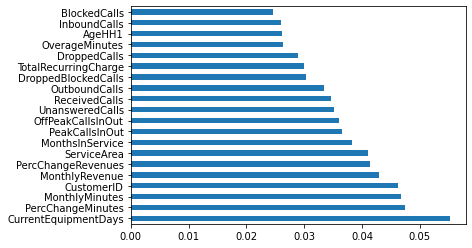

In [140]:
pd.Series(rfcla.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')